### K-Means Clustering

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters.

K-Means Clustering Overview:

##### Type: Unsupervised Learning algorithm.
Purpose: Groups an unlabeled dataset into different clusters based on similar properties.

K: Number of pre-defined clusters to be created.

Objective: Minimize the sum of distances between data points and their corresponding cluster centroids.


Algorithm Steps:

Select K: Decide the number of clusters.

Initialize Centroids: Select random K points or centroids.

Assign Data Points: Assign each data point to the closest centroid, forming K clusters.

Update Centroids: Calculate the variance and place a new centroid for each cluster.

Repeat Assignment: Reassign each data point to the new closest centroid.

Convergence Check: Repeat steps 4-5 until no reassignment occurs.

Final Model: Clusters are finalized.

In [29]:

# data processing

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv("Mall_Customers.csv")
dataset.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
X=dataset.iloc[:,3:5].values
print(X[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


##### Choosing Optimal K (Elbow Method):

WCSS (Within Cluster Sum of Squares): Measures total variation within clusters.

Elbow Method Steps:

Execute K-means clustering for different K values (1-10).

Calculate WCSS for each K.

Plot WCSS against K.

The "elbow" point in the plot indicates the optimal K.

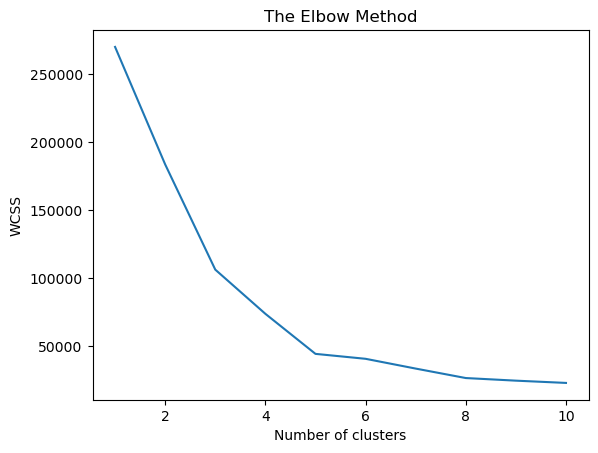

In [31]:
# Finding Optimal K using Elbow Method:
import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.cluster import KMeans

Wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    Wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), Wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [32]:
# From the above plot, we can see the elbow point is at 5. So the number of clusters here will be 5.

In [33]:
# Training the K-Means Algorithm:
kmean=KMeans(n_clusters=5, init="k-means++",random_state=42)
y_kmeans=kmean.fit_predict(X)


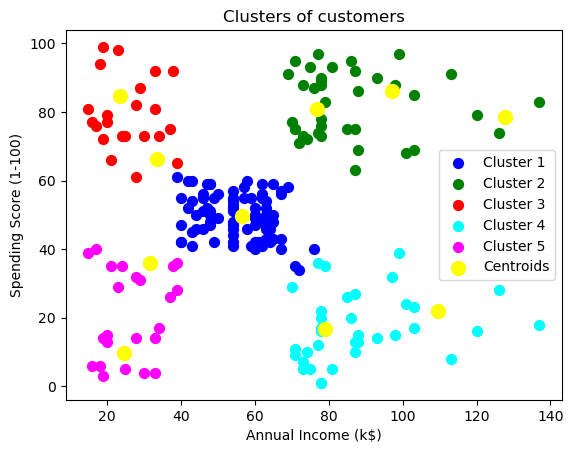

In [34]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='blue', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='green', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='red', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=50, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [35]:
# This visualization helps in understanding the distribution and characteristics of the clusters formed by the K-Means algorithm. For example:

# Cluster 1 (Blue): Customers with average income and average spending.
# Cluster 2 (Green): Customers with high income but low spending.
# Cluster 3 (Red): Customers with low income and low spending.
# Cluster 4 (Cyan): Customers with low income and high spending.
# Cluster 5 (Magenta): Customers with high income and high spending.

### K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a simple, supervised machine learning algorithm that can be used for both classification and regression tasks. However, it's most commonly used for classification.

**How KNN Works:**

Choose the number of neighbors (K):

K is the number of nearest data points (neighbors) the algorithm will consider when making a prediction.

A small value of K (e.g., K=1) means that noise will have a higher influence on the result, leading to a more complex model.

A large value of K makes the model simpler and less sensitive to noise, but it can also make the boundaries between classes less distinct.

**Calculate Distance:**

The distance between the new point and all the existing points in the dataset is calculated. The most common distance metric used is Euclidean distance:

Other distance metrics include Manhattan distance, Minkowski distance, etc.

**Identify Nearest Neighbors:**

Once the distances are calculated, the K nearest points are identified.
Vote for Labels:

In classification, the labels of these K nearest points are used to vote for the label of the new data point. The label with the most votes is assigned to the new point.

In regression, the average of the K nearest neighbors' values is taken.
Assign Class/Value:

The class or value that has the majority vote or average is assigned to the new data point.

In [36]:
# code for KNN

# import libraries 
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [37]:
#load dataset
dataset=load_iris()
X=dataset.data
y=dataset.target

In [38]:
print(X,y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [40]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

1.0


In [41]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


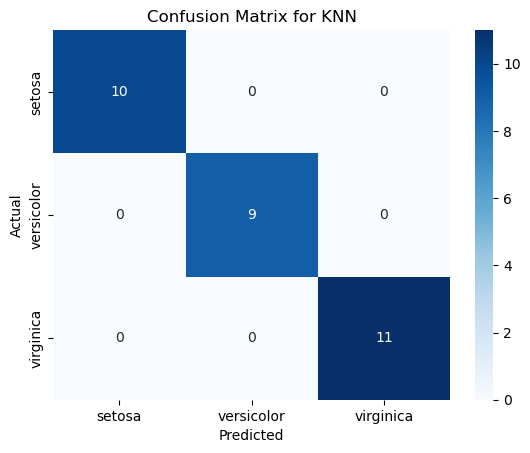

In [42]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=dataset.target_names,
            yticklabels=dataset.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

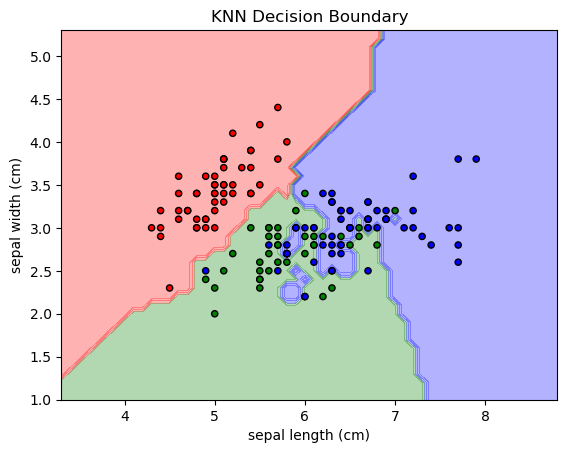

In [43]:
# plot the decision boundary:
from matplotlib.colors import ListedColormap

# Use only the first two features for visualization purposes
X_vis = X[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

# Fit KNN on the two-dimensional data
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)

# Create a mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', s=20, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlabel(dataset.feature_names[0])
plt.ylabel(dataset.feature_names[1])
plt.title('KNN Decision Boundary')
plt.show()


## Support Vector Machine (SVM) - Complete Explanation

**Support Vector Machine (SVM)** is a powerful and versatile supervised learning algorithm used for both classification and regression tasks. It is widely used in classification problems due to its effectiveness in high-dimensional spaces and its ability to create complex decision boundaries.

## Key Concepts of SVM

### Hyperplane:
- A **hyperplane** is a decision boundary that separates different classes in the feature space.
- In a 2D space, the hyperplane is simply a line. In a 3D space, it is a plane. In higher dimensions, it’s a hyperplane.
- The objective of SVM is to find the optimal hyperplane that best separates the data into different classes.

### Support Vectors:
- **Support vectors** are the data points that are closest to the hyperplane. These points are crucial in defining the position of the hyperplane.
- The hyperplane is chosen in such a way that it maximizes the margin between the closest points of the two classes.

### Margin:
- The **margin** is the distance between the hyperplane and the nearest data points from either class (support vectors).
- SVM aims to maximize this margin, ensuring that the hyperplane is as far as possible from any data point.

### Soft Margin and Hard Margin:
- **Hard Margin SVM:** All data points must be classified correctly with no tolerance for misclassification. This works well when the data is linearly separable.
- **Soft Margin SVM:** Allows for some misclassification or errors, introducing a penalty for incorrect classifications. This is controlled by a parameter \( C \), which balances margin maximization and classification errors.

### Kernel Trick:
- When data is not linearly separable in its original feature space, SVM can map the data to a higher-dimensional space where it becomes linearly separable using a technique called the "kernel trick."
- Common kernels include:
  - **Linear Kernel:** No transformation, just a linear hyperplane.
  - **Polynomial Kernel:** Adds polynomial features to the data.
  - **Radial Basis Function (RBF) Kernel:** Maps data to a higher dimension using an exponential function, effective in many cases where the relationship between features is complex.
  - **Sigmoid Kernel:** Similar to neural networks, maps data using a sigmoid function.

### Regularization Parameter (C):
- The parameter \( C \) controls the trade-off between maximizing the margin and minimizing the classification error.
- A small \( C \) allows for a larger margin with more misclassifications, while a large \( C \) forces the model to classify every point correctly, possibly leading to overfitting.


In [44]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # We use only the first two features for easy visualization
y = iris.target

# Filter out the data to have only two classes for binary classification (e.g., class 0 and class 1)
X = X[y != 2]
y = y[y != 2]

In [46]:
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the SVM classifier with a linear kernel
svm = SVC(kernel='linear', C=1.0)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


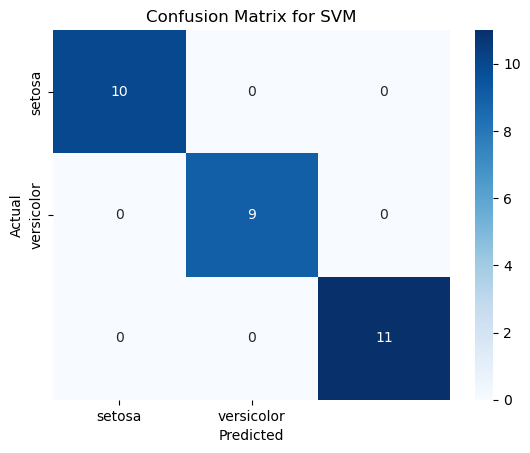

In [47]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names[:2],
            yticklabels=iris.target_names[:2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

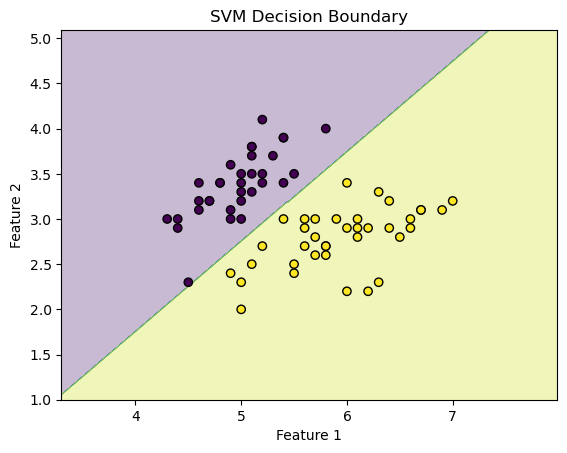

In [48]:
# Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_train, y_train, svm)